import __future__
import great_expectations as ge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
df=pd.read_csv("India_GDP_1960-2022.csv")
df

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,0.0,2021,3173.4,182160,8.95
2,1.0,2020,2667.69,154640,-6.6
3,2.0,2019,2831.55,165760,3.74
4,3.0,2018,2702.93,159840,6.45
...,...,...,...,...,...
58,57.0,1964,56.48,9280,7.45
59,58.0,1963,48.42,8080,5.99
60,59.0,1962,42.16,7200,2.93
61,60.0,1961,39.23,6800,3.72


In [3]:
#dropping first row

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df = df.rename(columns={'India GDP - Historical Data': 'Year'})
df = df.rename(columns={'India GDP - Historical Data.1': 'GDP in (Billion) $'})
df = df.rename(columns={'India GDP - Historical Data.2': 'Per Capita in rupees'})
df = df.rename(columns={'India GDP - Historical Data.3': 'Growth %'})


In [6]:
df

,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [7]:
df = df.drop([0])

In [8]:
df

,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
5,2017,2651.47,158480,6.8
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


Year= its Showing year of Indian GDP

GDP ( Billions of US) = its showing GDP ( Billions of US) per year

Per Capita= in this column per capita in rupees

Growth= showing changes in every year in

In [9]:
df['GDP in (Billion) $'] = df['GDP in (Billion) $'].astype(float)
df['Per Capita in rupees'] = df['Per Capita in rupees'].astype(float)
df['Growth %'] = df['Growth %'].astype(float)

In [10]:
#Line plot as Year on X axis with respect to Growth % on Y axis

<Axes: xlabel='Year', ylabel='Growth %'>

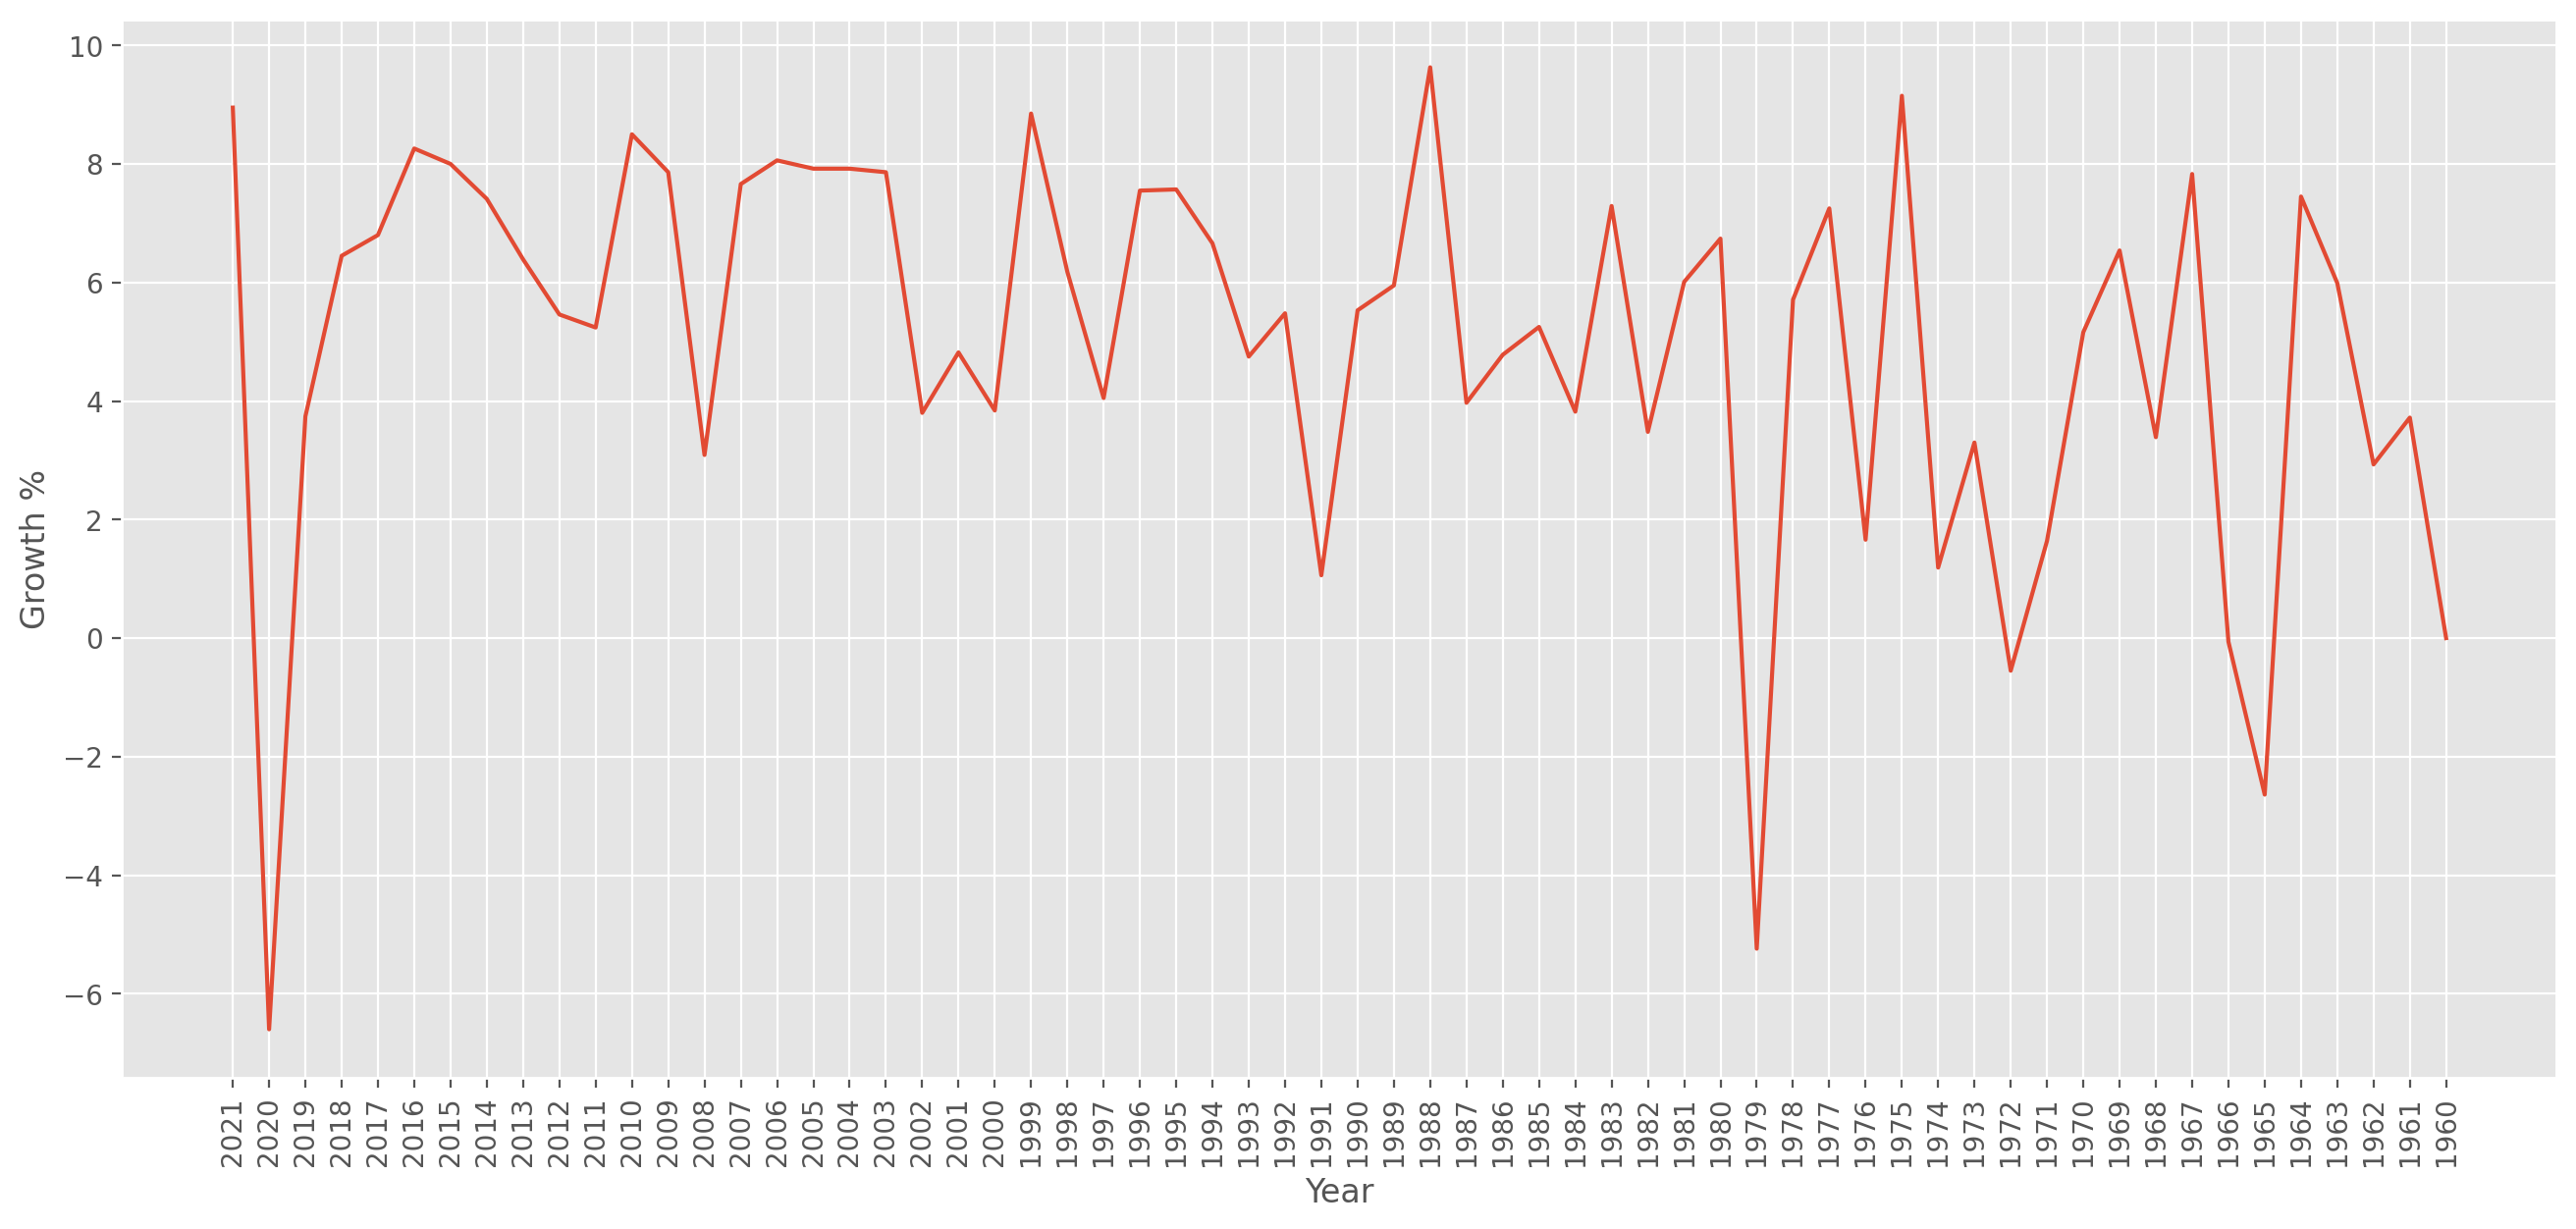

In [11]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['Growth %'], x = df.Year)

In [12]:
#Line plot as Year on X axis with respect to GDP in Billion $ on Y axis.

<Axes: xlabel='Year', ylabel='GDP in (Billion) $'>

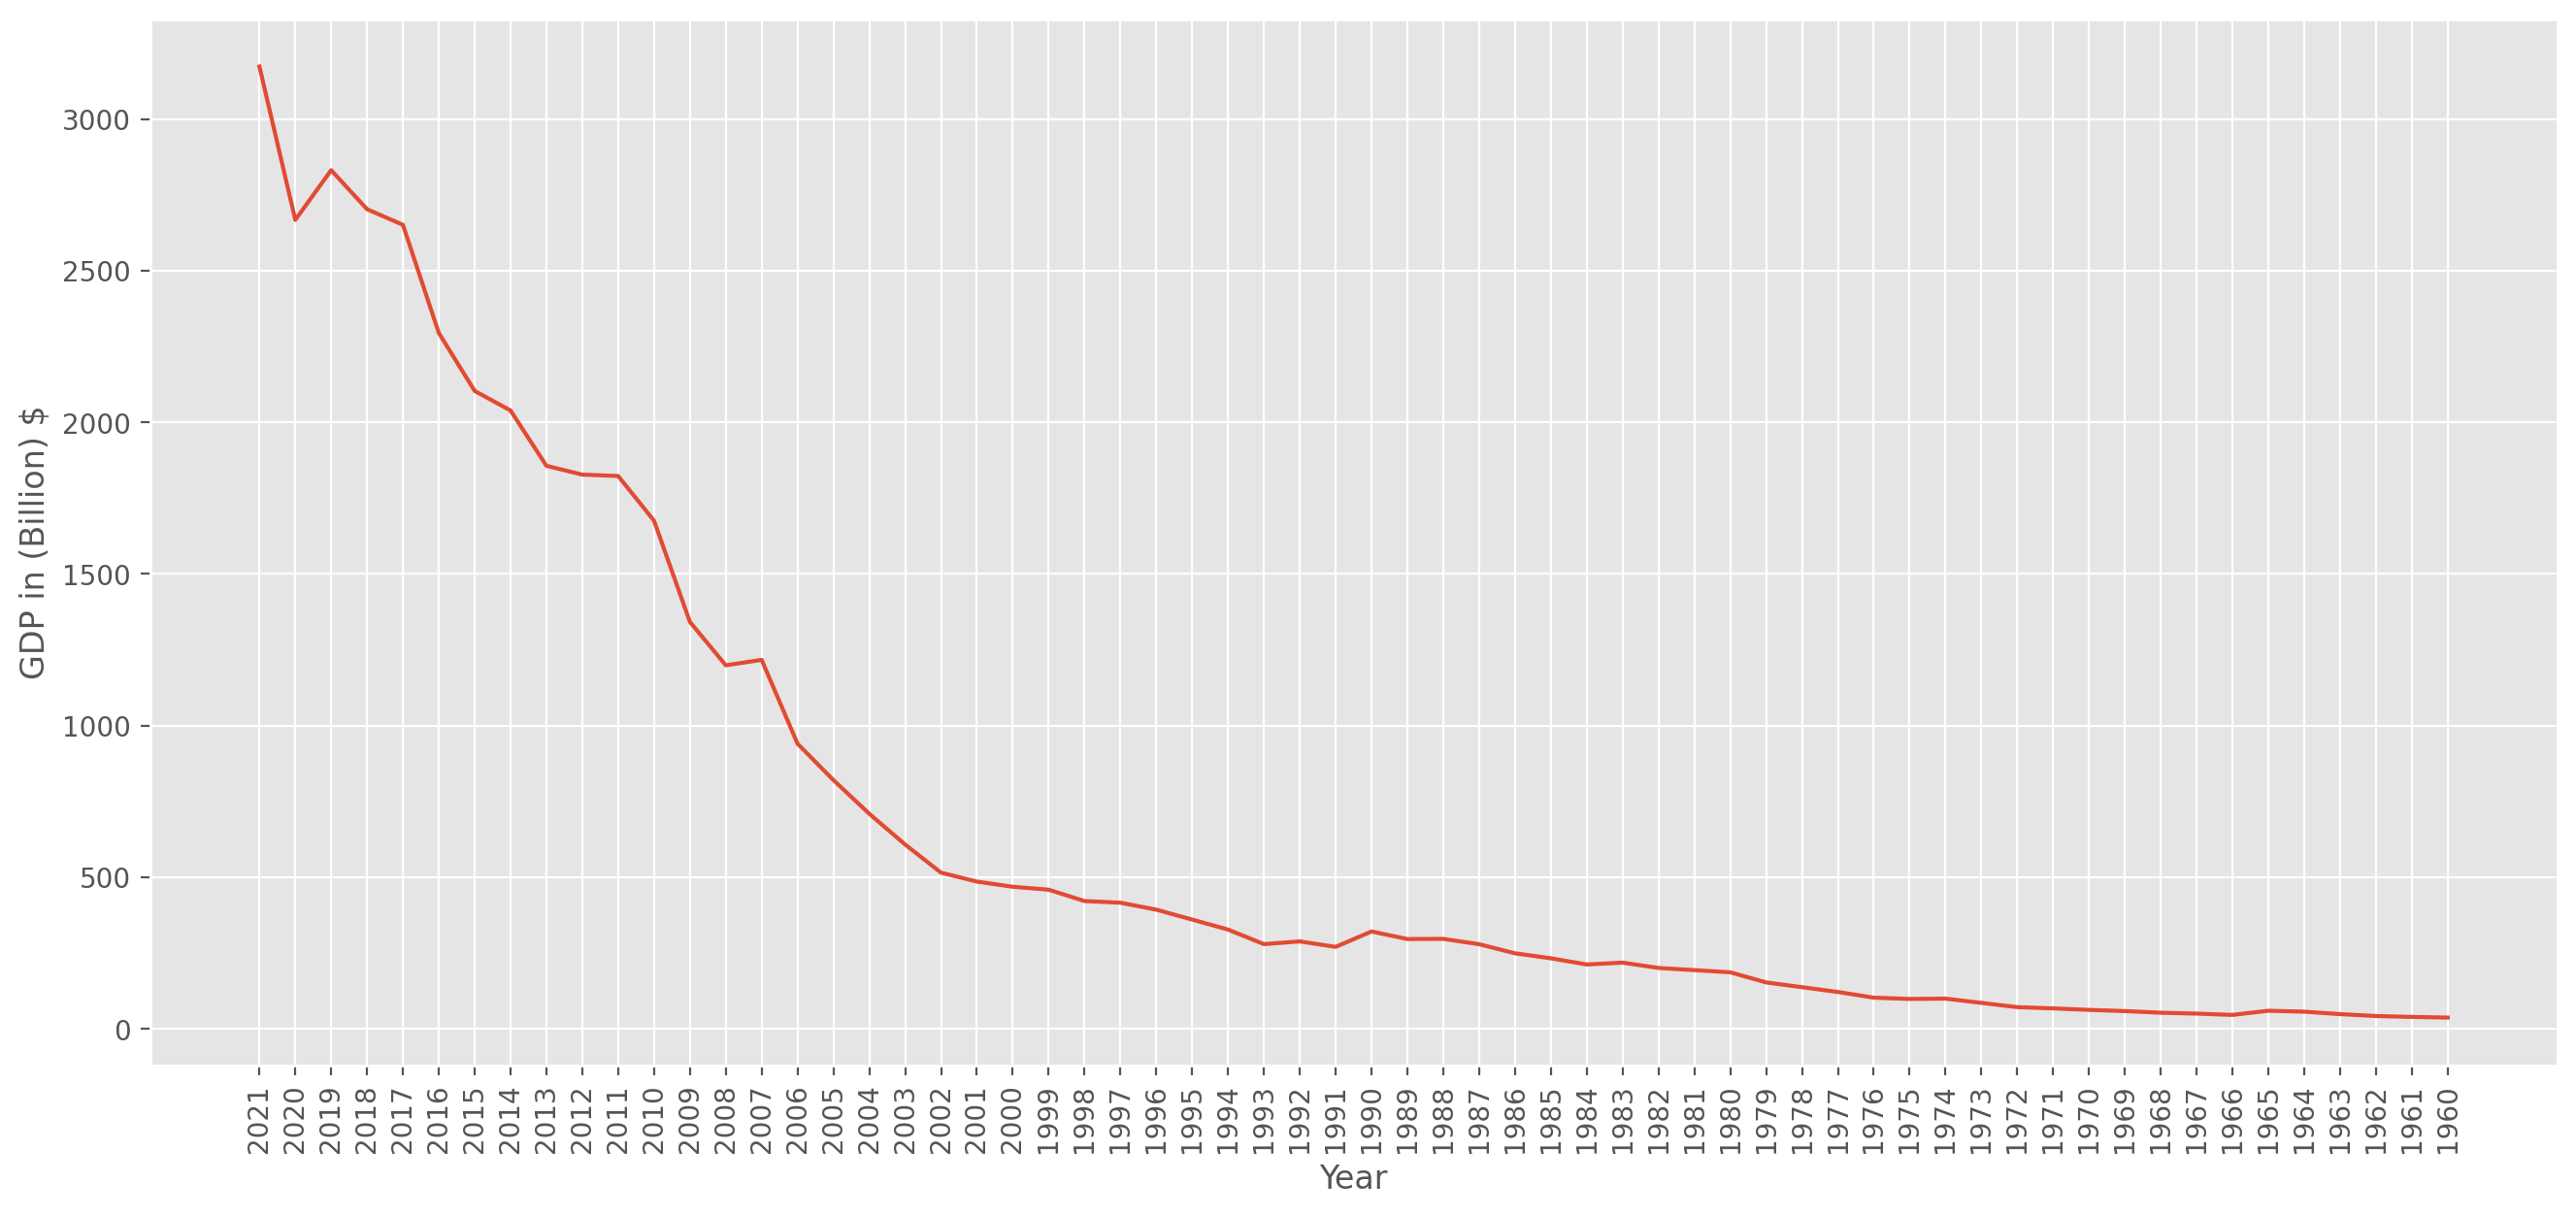

In [13]:
plt.figure(figsize = (16,7), dpi = 200)
plt.xticks(rotation = 90)
sns.lineplot(y = df['GDP in (Billion) $'], x = df.Year)

as we can see GDP is drastically increse after 2002.

In [14]:
cols_to_scale = ['GDP in (Billion) $','Per Capita in rupees','Growth %']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[cols_to_scale])

#scale selected data
df[cols_to_scale] = scaler.transform(df[cols_to_scale])

#scaleling has been done all the coulmns are converted into same unit

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["Year"]])
df[["Year"]] = enc.transform(df[["Year"]])

In [16]:
df

,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,61.0,2.876478,2.734405,1.197545
2,60.0,2.288584,2.172621,-3.525519
3,59.0,2.479074,2.399621,-0.384909
4,58.0,2.329551,2.278772,0.438210
5,57.0,2.269728,2.251009,0.544517
...,...,...,...,...
58,4.0,-0.746980,-0.794711,0.741944
59,3.0,-0.756350,-0.819207,0.298492
60,2.0,-0.763627,-0.837171,-0.630934
61,1.0,-0.767033,-0.845337,-0.390984


In [17]:
df.describe()

,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
count,62.000000,6.200000e+01,6.200000e+01,6.200000e+01
mean,30.500000,-1.880216e-16,6.446456e-17,-1.289291e-16
std,18.041619,1.008163e+00,1.008163e+00,1.008163e+00
min,0.000000,-7.695907e-01,-8.502362e-01,-3.525519e+00
25%,15.250000,-6.960066e-01,-7.204052e-01,-3.894654e-01
50%,30.500000,-4.730396e-01,-4.239986e-01,1.861106e-01
75%,45.750000,2.455849e-01,2.961958e-01,7.647239e-01
max,61.000000,2.876478e+00,2.734405e+00,1.404084e+00


<Axes: >

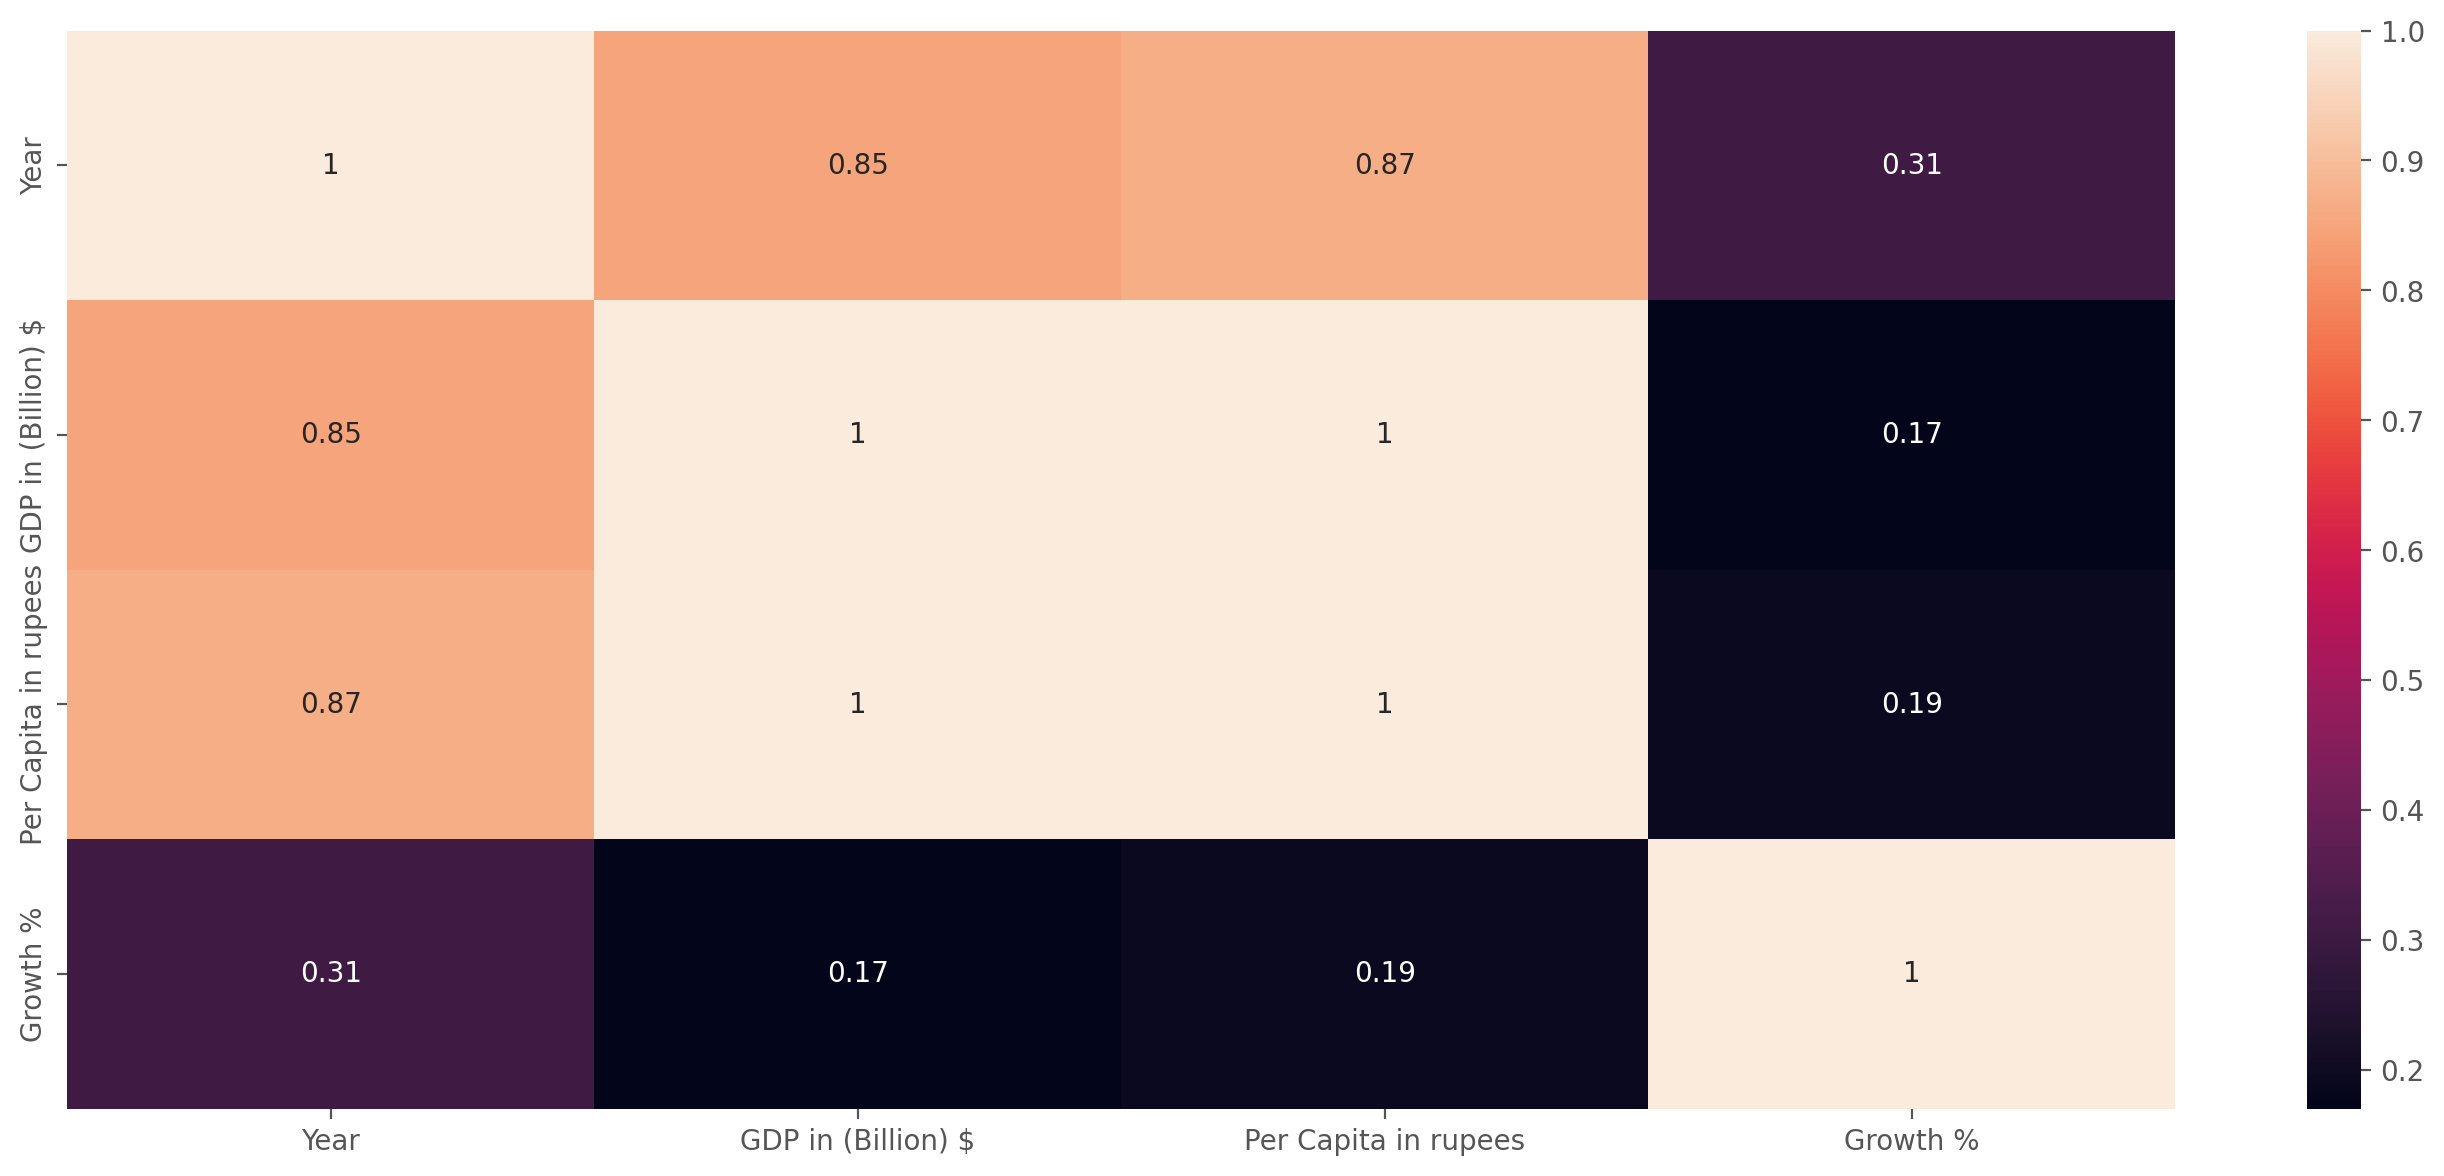

In [18]:
plt.figure(figsize = (17,7), dpi=200)
sns.heatmap(df.corr(), annot = True)

In [19]:
x = df[['Year', 'Growth %']]
y = df[['GDP in (Billion) $']]

In [20]:
x= df[['Year', 'Growth %']].values
y= df[['GDP in (Billion) $']].values

In [21]:
as we seen knn regression is performing well  and from this we can predict that the Growth percent per year will be always kept incresing and also the gdp in billon dollar will also be kept incresing 

SyntaxError: invalid syntax (3523701440.py, line 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 2)

# KNN regression model Training 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(xtrain, ytrain)

In [ ]:
print('Training Set Score : ', knn_reg.score(xtrain, ytrain))
print('Testing Set Score  : ', knn_reg.score(xtest, ytest))

In [ ]:
acc_train = []
acc_test  = []

for i in range(1,21):
    regressor = KNeighborsRegressor(n_neighbors = i)
    regressor.fit(xtrain, ytrain)
    
    acc_train.append(regressor.score(xtrain, ytrain))
    acc_test.append(regressor.score(xtest, ytest))

In [ ]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

As we can see the Training Set Accuracy and Testing Set Accuracy is kept increasing as the value of K is incresing.
The as the graph suggest the value for K should be 2 for best case or best fit.

In [ ]:
regressor = KNeighborsRegressor(n_neighbors = 2)
regressor.fit(xtrain, ytrain)

print('Training Set Accuracy : ', regressor.score(xtrain, ytrain))
print('Testing Set Accuracy  : ', regressor.score(xtest, ytest))

For this model the Best value for neighbors for KNN regression is 2

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear regression model Training

In [ ]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
LR_predictions=lr.predict(xtest)
print("Accuracy of Logistic Regression: {}%".format(lr.score(xtest, ytest) * 100 ))

# Decision tree regression model Training

In [ ]:
dtr= DecisionTreeRegressor(random_state=5,max_depth=4)
dtr.fit(xtrain,ytrain)
DecisionTree_predictions=dtr.predict(xtest)
print("Accuracy of Decision Tree: {}%".format(dtr.score(xtest, ytest) * 100 ))

# Random forest regression model Training

In [ ]:
RF = RandomForestRegressor(n_estimators=63)
RF.fit(xtrain, ytrain)
RF_predictions=RF.predict(xtest)
print("Accuracy of Random Forest: {}%".format(RF.score(xtest, ytest) * 100 ))

# Implementing Great Expectations on the dataset

In [ ]:
data1=ge.read_csv("India_GDP_1960-2022.csv")
data1

In [ ]:
data1 = data1.drop([0])
data1

In [ ]:
data1.nunique()

In [ ]:
data1.expect_column_median_to_be_between(column="India GDP - Historical Data.3", min_value=-3.525519e+00, max_value=1.404084e+00)


In [ ]:
data1.expect_column_most_common_value_to_be_in_set(column="India GDP - Historical Data.1",value_set=[32,33,34])

In [ ]:
data1.min()

In [ ]:
data1.boxplot()